# Plotting the Outputs of Our Optimizers

## Load and Plot Filtered Signals
Load the NPZ file containing optimization results and visualize the filtered signals.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the NPZ file
npz_file_path = Path("../results/sensitivity_comparison_results.npz")
data = np.load(npz_file_path, allow_pickle=True)

print("Available keys in NPZ file:")
print(data.files)
print("\n")

# Access the first experiment (or specify which one you want)
exp_0 = data['exp 1'].item()  # .item() converts object array to dict

print("Keys in experiment 0:")
for key in exp_0.keys():
    value = exp_0[key]
    if isinstance(value, np.ndarray):
        print(f"  {key}: ndarray shape={value.shape}, dtype={value.dtype}")
    else:
        print(f"  {key}: {type(value).__name__} = {value}")
print("Optimized Window:", exp_0['Optimized_Window'])

Available keys in NPZ file:
['exp 0', 'exp 1', 'exp 2', 'exp 3', 'exp 4', 'exp 5', 'exp 6', 'exp 7', 'exp 8', 'exp 9', 'exp 10', 'exp 11', 'exp 12', 'exp 13', 'exp 14']


Keys in experiment 0:
  Measurand: str = V
  Depth_mm: int = 5
  Optimizer: str = LiuOptimizer(measurand=NthOrderCenteredMoment, dtof_to_find_max_on=mean, fhr_hw=0.3)
  Optimized_Sensitivity: float = -1.0
  Epochs: int = 0
  Bin_Edges: ndarray shape=(21,), dtype=float64
  Optimized_Window: ndarray shape=(20,), dtype=float32
  fetal_hb_series: ndarray shape=(60,), dtype=float64
  filtered_signal: ndarray shape=(60,), dtype=float32
Optimized Window: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.70710677 0.70710677 0.         0.         0.         0.
 0.         0.        ]


In [16]:
terminal_points_to_drop = 8
# Extract filtered signal and fetal heartbeat series
filtered_signal = exp_0['filtered_signal']
fetal_hb_series = exp_0['fetal_hb_series']
measurand = exp_0['Measurand']
optimizer = exp_0['Optimizer']
depth = exp_0['Depth_mm']

print(f"Measurand: {measurand}")
print(f"Depth: {depth} mm")
print(f"Optimizer: {optimizer}")
print(f"\nFiltered Signal shape: {filtered_signal.shape}, dtype: {filtered_signal.dtype}")
print(f"Fetal HB Series shape: {fetal_hb_series.shape}, dtype: {fetal_hb_series.dtype}")


Measurand: V
Depth: 5 mm
Optimizer: LiuOptimizer(measurand=NthOrderCenteredMoment, dtof_to_find_max_on=mean, fhr_hw=0.3)

Filtered Signal shape: (60,), dtype: float32
Fetal HB Series shape: (60,), dtype: float64


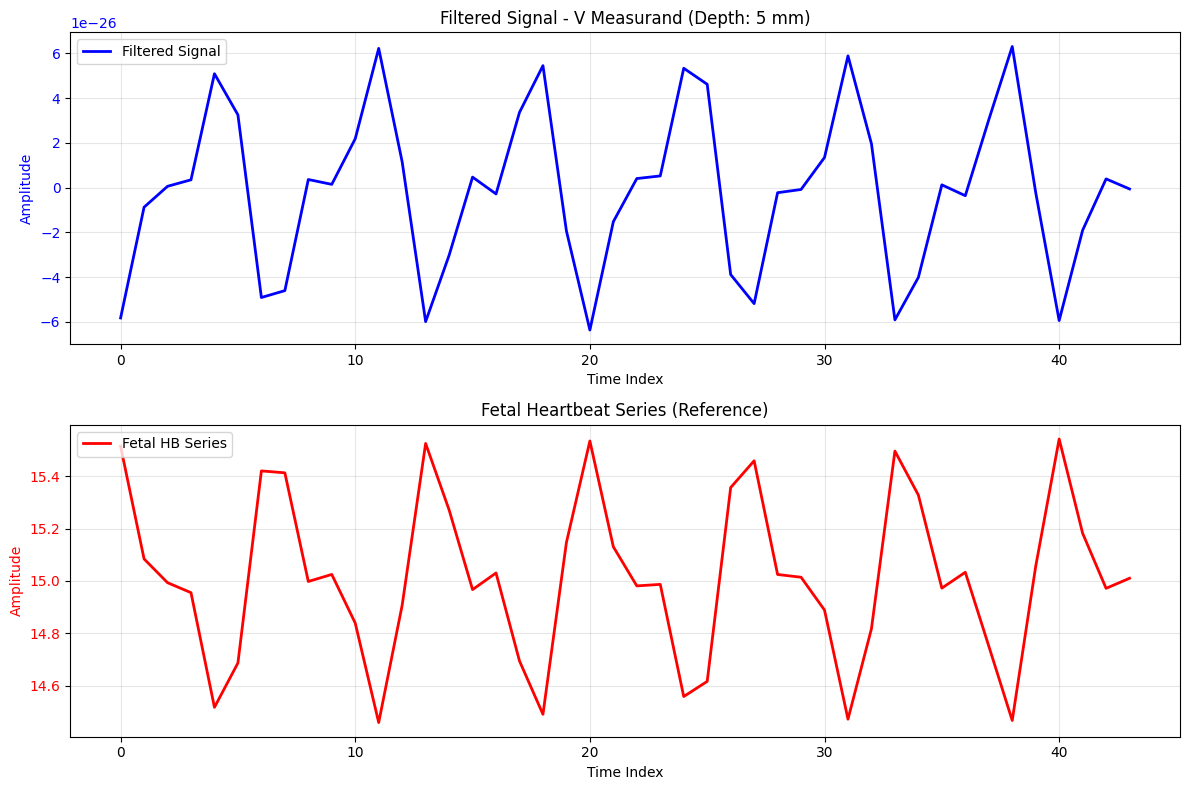

In [17]:
# Plot filtered signal vs fetal heartbeat series
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Time axis
filtered_signal = filtered_signal[terminal_points_to_drop:-terminal_points_to_drop]
fetal_hb_series = fetal_hb_series[terminal_points_to_drop:-terminal_points_to_drop]
time = np.arange(len(filtered_signal))

# Plot 1: Filtered Signal
axes[0].plot(time, filtered_signal, 'b-', linewidth=2, label='Filtered Signal')
axes[0].set_xlabel('Time Index')
axes[0].set_ylabel('Amplitude', color='b')
axes[0].set_title(f'Filtered Signal - {measurand} Measurand (Depth: {depth} mm)')
axes[0].tick_params(axis='y', labelcolor='b')
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='upper left')

# Plot 2: Fetal Heartbeat Series
axes[1].plot(time, fetal_hb_series, 'r-', linewidth=2, label='Fetal HB Series')
axes[1].set_xlabel('Time Index')
axes[1].set_ylabel('Amplitude', color='r')
axes[1].set_title('Fetal Heartbeat Series (Reference)')
axes[1].tick_params(axis='y', labelcolor='r')
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


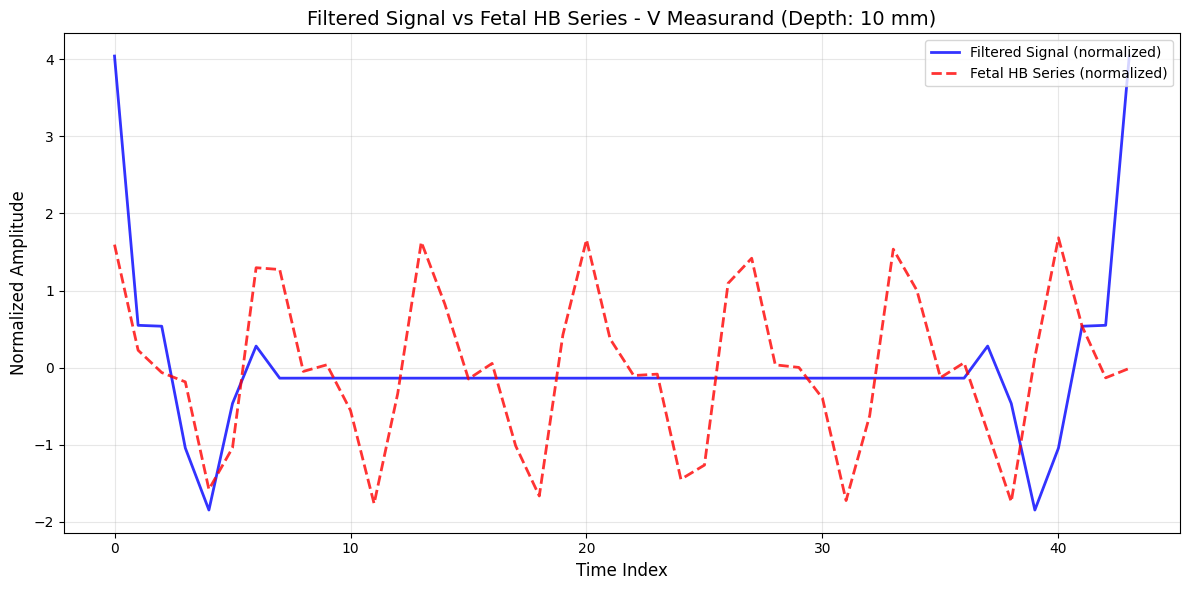


Correlation between filtered signal and fetal HB series: 0.2096


: 

: 

In [ ]:
# Plot both signals on the same graph for comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Normalize both signals to compare shapes
filtered_norm = (filtered_signal - np.mean(filtered_signal)) / np.std(filtered_signal)
fetal_hb_norm = (fetal_hb_series - np.mean(fetal_hb_series)) / np.std(fetal_hb_series)

time = np.arange(len(filtered_signal))
ax.plot(time, filtered_norm, 'b-', linewidth=2, label='Filtered Signal (normalized)', alpha=0.8)
ax.plot(time, fetal_hb_norm, 'r--', linewidth=2, label='Fetal HB Series (normalized)', alpha=0.8)
ax.set_xlabel('Time Index', fontsize=12)
ax.set_ylabel('Normalized Amplitude', fontsize=12)
ax.set_title(f'Filtered Signal vs Fetal HB Series - {measurand} Measurand (Depth: {depth} mm)', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Print correlation
correlation = np.corrcoef(filtered_signal, fetal_hb_series)[0, 1]
print(f"\nCorrelation between filtered signal and fetal HB series: {correlation:.4f}")
